# CHAPTER04 선형 회귀로 이해하는 지도학습 (p.129)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## 4.1 다음은 P 자동차 회사의 차종과 마력, 그리고 평균연비(단위 : km/l)를 나타내는 표이다.
||A|B|C|D|E|F|G|
|:---|---:|---:|---:|---:|---:|---:|---:|
|마력|130|250|190|300|210|220|170|
|연비|16.3|10.2|11.1|7.1|12.1|13.2|14.2|

### 1) P 자동차 회사의 마력과 연비 사이에는 어떤 상관관계가 있을까? 선형 회귀 분석을 통해서 선형 회귀 모델의 절편과 계수를 구하여라. 마지막으로 이 선형 회귀 모델이 입력 마력 값에 대해 연비를 예측하는 데 얼마나 적합한지 예측 점수를 출력해 보라.
계수 : [-0.05027473]

절편 : 22.58626373626374

예측 점수 : 0.8706727649378526

In [2]:
horsepower = pd.Series([130, 250, 190, 300, 210, 220, 170])
efficiency = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])
df = pd.DataFrame({'horse power': horsepower, 'efficiency': efficiency})

x = df['horse power'].to_numpy()
y = df['efficiency'].to_numpy()
x = x[:, np.newaxis]

regr = linear_model.LinearRegression()
regr.fit(x, y)

print("계수 :", regr.coef_)
print("절편 :", regr.intercept_)
print("예측 점수 :", regr.score(x, y))

계수 : [-0.05027473]
절편 : 22.58626373626374
예측 점수 : 0.8706727649378526


### 2) 위의 선형 회귀 모델을 바탕으로 270 마력의 신형엔진을 가진 자동차를 개발하려 한다. 이 자동차의 연비를 선형 회귀 모델에 적용하여 다음과 같이 구해 보자. 출력은 다음과 같이 소수점 둘째 자리까지 출력해 보라.
270 마력 자동차의 예상 연비 : 9.01 km/l

In [3]:
# w * x + b
print("270 마력 자동차의 예상 연비 :" ,round((regr.coef_*270 + regr.intercept_)[0], 2), "km/l")

270 마력 자동차의 예상 연비 : 9.01 km/l


## 4.2 자동차의 연비에 영향을 미치는 요소는 마력뿐만 아니라 총중량도 중요한 요소가 될 것이다. 다음은 P 자동차 회사의 차종과 마력, 뿐만아니라 자동차의 총중량(단위 : kg)을 추가한 표이다.
||A|B|C|D|E|F|G|
|:---|---:|---:|---:|---:|---:|---:|---:|
|마력|130|250|190|300|210|220|170|
|총중량|1,900|2,600|2,200|2,900|2,400|2,300|2,100|
|연비|16.3|10.2|11.1|7.1|12.1|13.2|14.2|

### 1) 위의 자료를 바탕으로 적절한 선형 회귀 모델을 구현하여라. 이 모델의 계수와 절편, 예측모델의 점수를 출력하라.
계수 : [-0.00689189 -0.00731081]

절편 : 30.60405405405405

예측 점수 : 0.887125404119239

In [4]:
horsepower = pd.Series([130, 250, 190, 300, 210, 220, 170])
weight     = pd.Series([1900, 2600, 2200, 2900, 2400, 2300, 2100])
efficiency = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])
df = pd.DataFrame({'horse power': horsepower, 'weight': weight, 'efficiency': efficiency})

x = df[['horse power', 'weight']].to_numpy()
y = df['efficiency'].to_numpy()

regr = linear_model.LinearRegression()
regr.fit(x, y)

print("계수 :", regr.coef_)
print("절편 :", regr.intercept_)
print("예측 점수 :", regr.score(x, y))

계수 : [-0.00689189 -0.00731081]
절편 : 30.60405405405405
예측 점수 : 0.887125404119239


### 2) 위의 선형 회귀 모델을 바탕으로 270마력의 신형엔진을 가진 총중량 2,500kg의 자동차를 개발하려 한다. 이 자동차의 연비를 선형 회귀 모델에 적용하여 다음과 같이 구해 보라.
270 마력 2500kg 자동차의 예상 연비 : 10.47 km/l

In [5]:
# w1 * x1 + w2 * x2 + b
print("270 마력 2500kg 자동차의 예상 연비 :", round(regr.coef_[0]*270+regr.coef_[1]*2500+regr.intercept_, 2), "km/l")

270 마력 2500kg 자동차의 예상 연비 : 10.47 km/l


### 3) 마력과 총중량, 연비 사이의 상관관계를 쌍플롯으로 그려 보라.

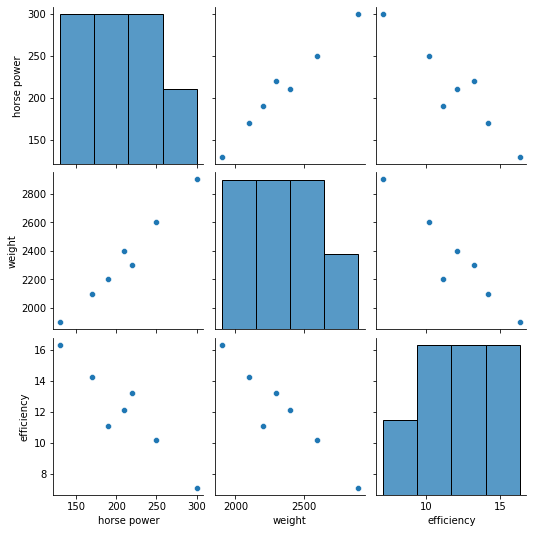

In [6]:
import seaborn as sns
sns.pairplot(df[['horse power', 'weight', 'efficiency']])

### 4) 마력과 총중량, 연비사이의 상관관계를 seaborn의 히트맵으로 가시화해 보라.

<AxesSubplot:>

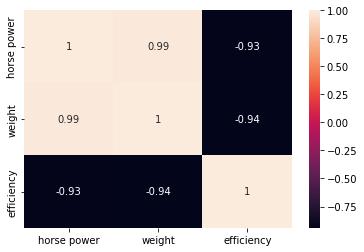

In [7]:
correlation_matrix = df.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)

### 5) 앞서 풀어 본 3), 4)의 내용을 바탕으로 마력, 총중량, 연비의 상관관계를 조사하고 이를 3개 이상의 문장으로 요약 정리하라.

각각은 자기 자신과 상관관계가 모두 1로 정비례한다.

마력과 총중량은 0.99, 1로 거의 정비례한다.

반면 연비는 마력과 총중량 둘 모두와 -0.93, -0.94로 거의 정반비례한다.